Import Libraries

In [18]:
import os
import numpy as np
import netCDF4 as nc
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [19]:
#This is step is to understand the variable name used in the .nc file 

#function to load data from .nc files
def load_nc_data(file_path):
    dataset = nc.Dataset(file_path)
    
    # Check available variable names in the dataset
    print(dataset.variables.keys())
    
    # Return dataset variables
    return dataset

# Load dataset
file_path = '/Users/chiraggurumurthy/D7046E/Project/Dataset/April/T34UFA_20200401T093029_tile_3_9.nc'
dataset = load_nc_data(file_path)

dict_keys(['TCI_R', 'TCI_G', 'TCI_B', 'B04', 'B03', 'B02', 'B08', 'B05', 'B8A', 'B06', 'B11', 'B12', 'B09', 'B10', 'B01', 'Label', 'B07'])


Image shape: (512, 512, 3)
Mask shape: (512, 512)


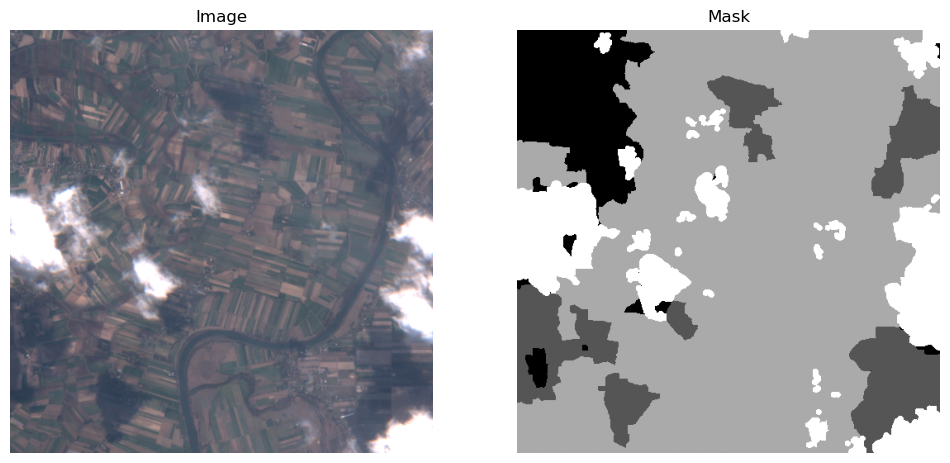

In [28]:
#This cell is to understand the properties of one .nc file in the folder 

# function to load data from .nc files
def load_nc_data(file_path):
    dataset = nc.Dataset(file_path)
    
    # Load the different bands and labels
    tci_r = dataset.variables['TCI_R'][:]  # Red band
    tci_g = dataset.variables['TCI_G'][:]  # Green band
    tci_b = dataset.variables['TCI_B'][:]  # Blue band
    mask = dataset.variables['Label'][:]  # Mask data
    
    # Combine the RGB bands to form the image
    image = np.stack((tci_r, tci_g, tci_b), axis=-1)
    
    return image, mask

# Load dataset
file_path = '/Users/chiraggurumurthy/D7046E/Project/Dataset/April/T34UFA_20200401T093029_tile_3_9.nc'
image, mask = load_nc_data(file_path)

print(f'Image shape: {image.shape}')
print(f'Mask shape: {mask.shape}')

# Function to plot images and masks
def plot_sample(image, mask):
    plt.figure(figsize=(12, 6))
    
    # Plot image (color composite)
    plt.subplot(1, 2, 1)
    plt.imshow(image)  # image[index] will correctly slice (512, 512, 3)
    plt.title('Image')
    plt.axis('off')  # Hide axes for a clean view
    
    # Plot mask (binary)
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')  # mask[index] will correctly slice (512, 512)
    plt.title('Mask')
    plt.axis('off')  # Hide axes for a clean view
    
    plt.show()

# Plot the first sample
plot_sample(image, mask)


Total number of images loaded: 45568
Total number of masks loaded: 45568


TypeError: Invalid shape (512,) for image data

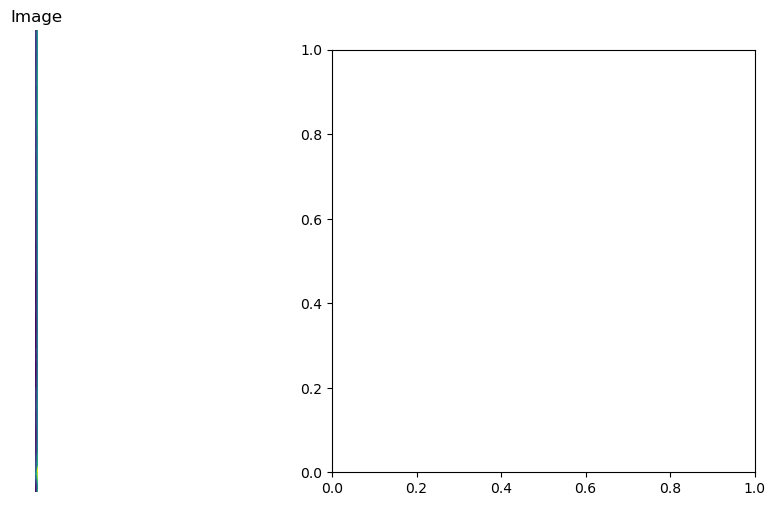

In [29]:
#This cell will load all images into two lists 

# Function to plot images and masks
def plot_sample(image, mask, index=0):
    plt.figure(figsize=(12, 6))
    
    # Plot image (color composite)
    plt.subplot(1, 2, 1)
    plt.imshow(image[index])  # image[index] will correctly slice (512, 512, 3)
    plt.title('Image')
    plt.axis('off')  # Hide axes for a clean view
    
    # Plot mask (binary)
    plt.subplot(1, 2, 2)
    plt.imshow(mask[index], cmap='gray')  # mask[index] will correctly slice (512, 512)
    plt.title('Mask')
    plt.axis('off')  # Hide axes for a clean view
    
    plt.show()

# A function to iterate over all the .nc files in from each folders 
def load_data_from_folders(base_folder):
    images = []
    masks = []
    
    month_names = ["January", "February", "March", "April", "May", "June", 
                    "July", "August", "September", "October", "November", "December"]

    for month_name in month_names:
     # Construct the folder path for each month
        month_folder = os.path.join(base_folder, month_name)
    
        if os.path.exists(month_folder):
            # Loop through all .nc files in the folder
            for filename in os.listdir(month_folder):
                if filename.endswith('.nc'):
                    file_path = os.path.join(month_folder, filename)
                    #print(f"Processing file: {file_path}")
                    
                    # Load images and masks from the .nc file
                    image, mask = load_nc_data(file_path)
                    images.append(image)
                    masks.append(mask)
                    
    #convert lists to numopy arrays
    images_array = np.array(images)
    masks_array = np.array(masks)

    return images, masks
                    
# Define the base folder that contains the months (January to December)
base_folder = '/Users/chiraggurumurthy/D7046E/Project/Dataset'

# Process images from all folders
images, masks = load_data_from_folders(base_folder)

# Check if images and masks have been loaded correctly
print(f"Total number of images loaded: {len(images)}")
print(f"Total number of masks loaded: {len(masks)}")

# Plot the first image and mask from the file
plot_sample(images, masks, index=2)